# Ejercicio 1
Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$ usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos. Nota: El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de Euler que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [1]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [2]:
f(x,t)=[1.0*x[2], -1.0*x[1]-1.0*x[2]]

f (generic function with 1 method)

In [3]:
list=0:0.01:100;
vec=euler(f,list,[0,1]);

In [4]:
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);

In [5]:
using PyPlot

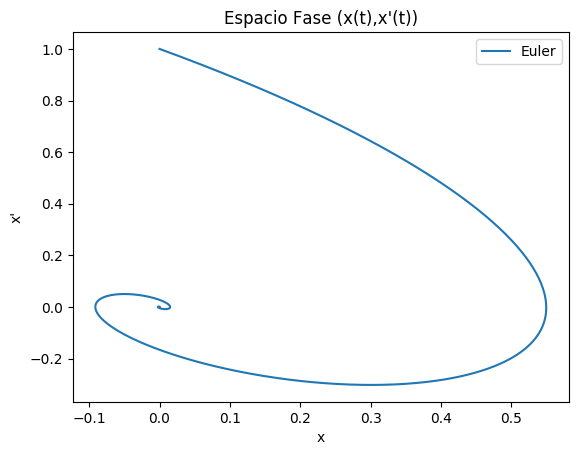

In [6]:
xlabel("x")
ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
plot(listx1,listx2,label="Euler")
legend();

In [7]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [8]:
f(x,t)=[1.0*x[2], -1.0*x[1]-1.0*x[2]]

f (generic function with 1 method)

In [9]:
list=0:0.01:100;
vec=RK4(f,list,[0,1]);

In [10]:
listv1=map(x->x[1],vec);
listv2=map(x->x[2],vec);

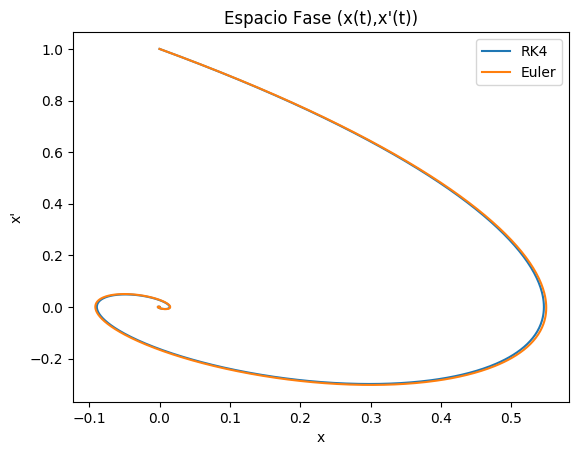

In [11]:
xlabel("x")
ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
plot(listv1,listv2,label="RK4")
plot(listx1,listx2,label="Euler")
legend();

# Ejercicio 2
Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

Ejemplo útil para graficar muchas condiciones iniciales (en el siguiente caso un vector de dos dimensiones), números aleatorios entre el $-6$ y $6$:


In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[2], -sin(x[1])]

f (generic function with 1 method)

In [3]:
using PyPlot

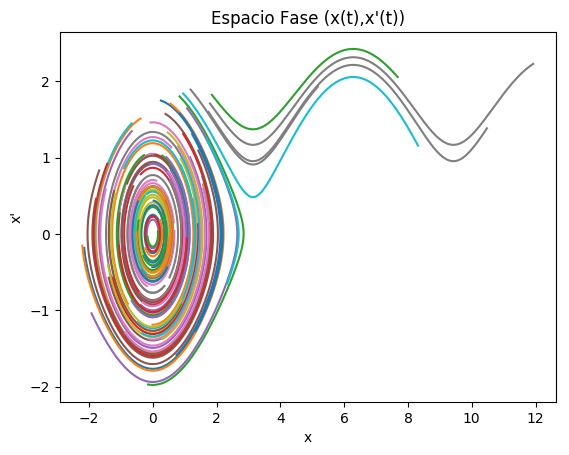

In [12]:
list=linspace(-pi,pi,1000)
for i in 1:20
    ci=2*rand(2,1)-1
    y=RK4(f,list,ci)
    plot(map(x->x[1],y),map(x->x[2],y))
end
list=linspace(-pi,pi,1000)
for i in 1:20
    ci=2*rand(2,1)-0.1
    y=RK4(f,list,ci)
    plot(map(x->x[1],y),map(x->x[2],y))
end
list=linspace(0,pi,1000)
for i in 1:20
    ci=2*rand(2,1)-1
    y=RK4(f,list,ci)
    plot(map(x->x[1],y),map(x->x[2],y))
end
list=linspace(0,pi,1000)
for i in 1:20
    ci=2*rand(2,1)-0.1
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

Se observa en el espacio fase de la gràfica anterior que en el $(0,0)$ es una silla, mientras que en los otros puntos $(pi,0)$ y $(-pi,0)$ son centros; asì sucesivamente con los demàs puntos, de tal forma que en los mùltiplos pares de pi es una silla y en los mùltiplos impares son centros.

# Ejercicio 3
Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=x[1]^2-1 #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [3]:
using PyPlot

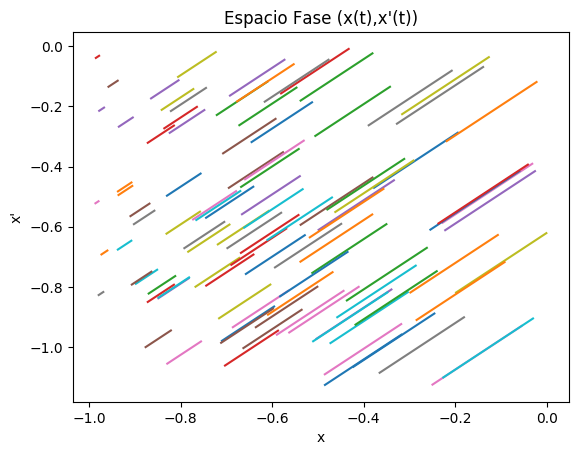

In [4]:
list=linspace(0,0.2,1000)
for i in 1:100
    ci=1*rand(2,1)-1
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
   end

Con el espacio fase de la gràgica anterior se comprueba que efectivamente el punto -1 es "atractor", mientras que el 1 es un "repulsor".

In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=x[1]^2-1 #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [3]:
using PyPlot

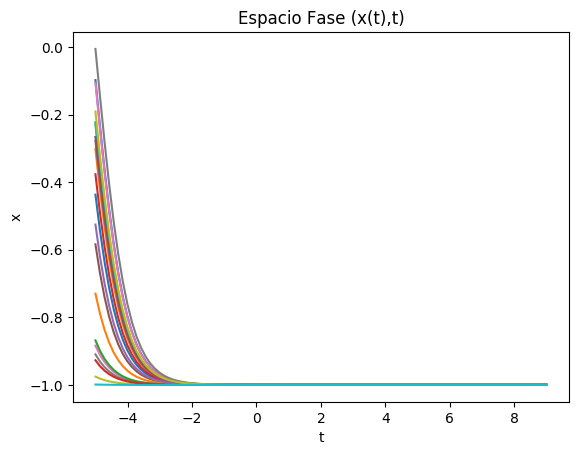

In [5]:
list=linspace(-5,9,100)
for i in 1:20
    ci=1*rand(2,1)-1
    y=RK4(f,list,ci)
    xlabel("t")
    ylabel("x")
title("Espacio Fase (x(t),t)")
    plot(list,map(x->x[1],y))
end

# Ejercicio 4
También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$ cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=x[1]^2 #Se declara el valor de la función f(x,t) como dx/dt

f (generic function with 1 method)

In [3]:
using PyPlot

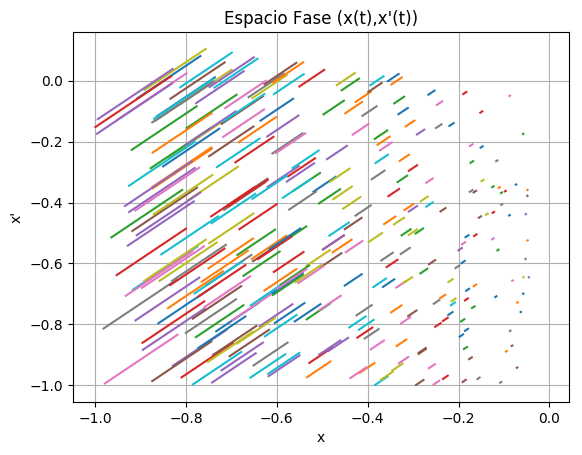

In [4]:
list=linspace(0,0.2,1000)
for i in 1:300
    ci=1*rand(2,1)-1
    y=RK4(f,list,ci)
    xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    grid("on")
    plot(map(x->x[1],y),map(x->x[2],y))
end

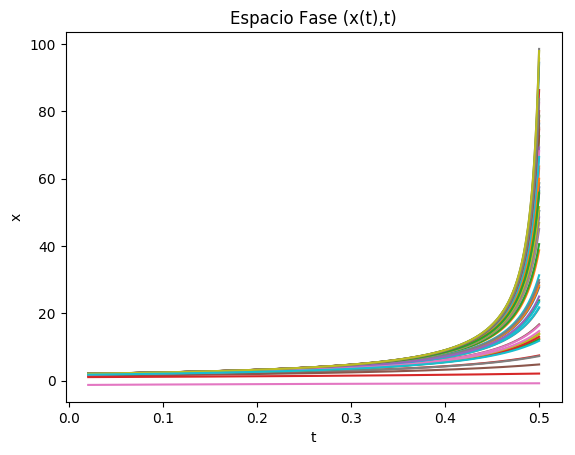

In [5]:
list=linspace(0.5,0.02,1000)
for i in 1:60
    ci=100*rand(2,1)-1
    y=RK4(f,list,ci)
    xlabel("t")
    ylabel("x")
title("Espacio Fase (x(t),t)")
    plot(list,map(x->x[1],y))
end

¿cual es el punto fijo único?, es un atractor o un repulsor?
El ùnico punto fijo es el $(0.0)$ y es un atractor


# Ejercicio 5
Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:

    a=c=1, b=d=0
    a=c=-1, b=d=0
    a=1, d=-2, c=b=0
    a=1, d=-0.5, c=b=0
    a=d=0, b=-c=1
    a=d=1, b=-c=1
    a=d=-1, b=-c=1
    a=d=-1, b=-c=-1
    a=d=1, b=4,c=-2
    a=b=d=-1, c=0





In [1]:
#Sistema formado con a=c=1, b=d=0
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[1], x[1]]

f (generic function with 1 method)

In [3]:
using PyPlot

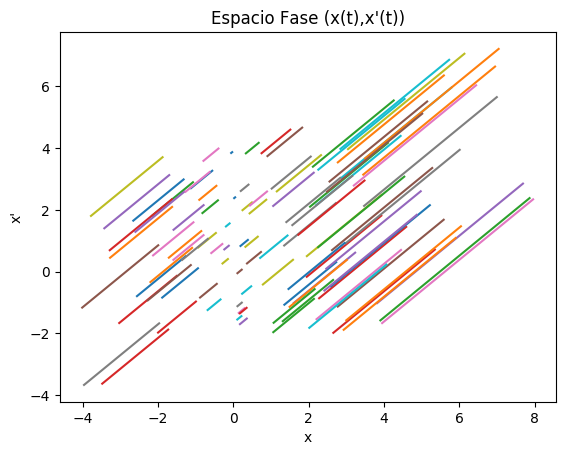

In [11]:
list=linspace(0.3,1,1000)
for i in 1:100
    ci=6*rand(2,1)-2
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [1]:
#Sistema formado a=c=-1, b=d=0
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[-x[1], -x[1]]

f (generic function with 1 method)

In [3]:
using PyPlot

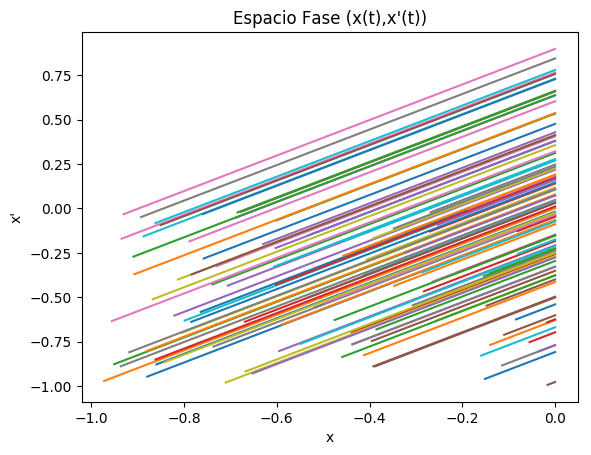

In [4]:
list=linspace(0,10,1000)
for i in 1:100
    ci=1*rand(2,1)-1
    y=RK4(f,list,ci)
    xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [1]:
#Sistema formado a=1, d=-2, c=b=0
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[1], -2*x[2]]

f (generic function with 1 method)

In [3]:
using PyPlot

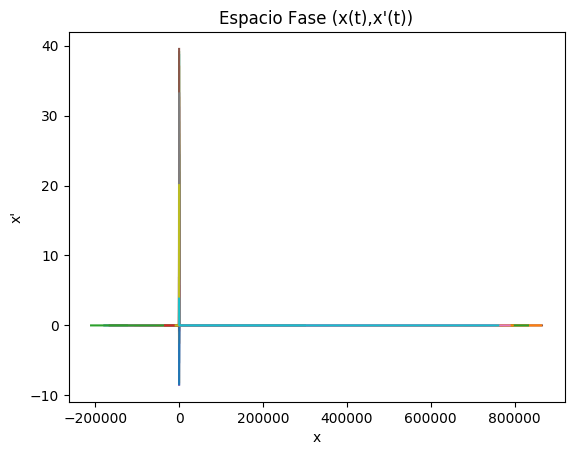

In [4]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-10
    y=RK4(f,list,ci)
    xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [1]:
#Sistema formado a=1, d=-0.5, c=b=0
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[1], -0.5*x[2]]

f (generic function with 1 method)

In [3]:
using PyPlot

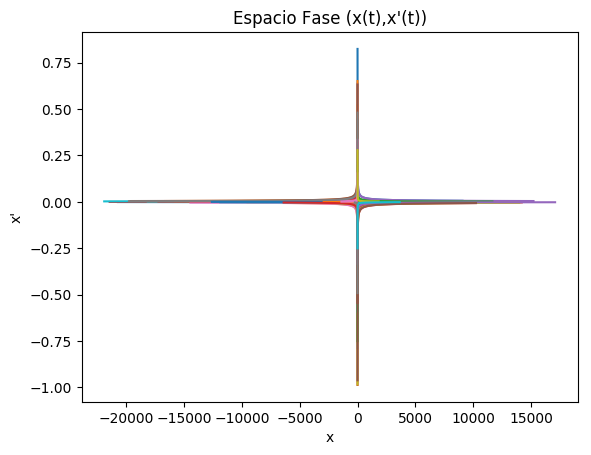

In [4]:
list=linspace(0,10,1000)
for i in 1:50
    ci=2*rand(2,1)-1
    y=RK4(f,list,ci)
    xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [1]:
#Sistema formado a=d=0, b=-c=1
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[2], -x[1]]

f (generic function with 1 method)

In [3]:
using PyPlot

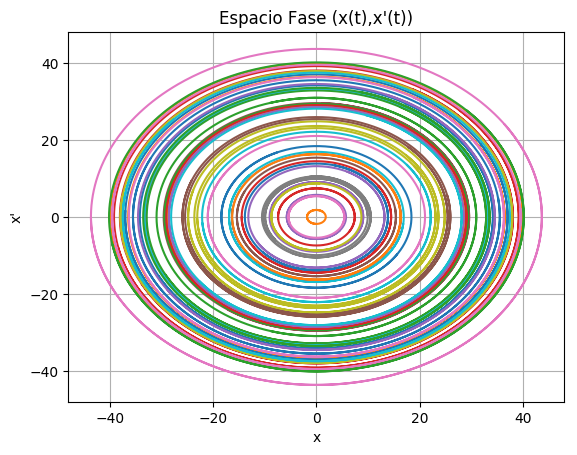

In [4]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-10
    y=RK4(f,list,ci)
    xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    grid("on")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [1]:
#Sistema formado  a=d=1, b=-c=1
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[1]+x[2], -x[1]+x[2]]

f (generic function with 1 method)

In [3]:
using PyPlot

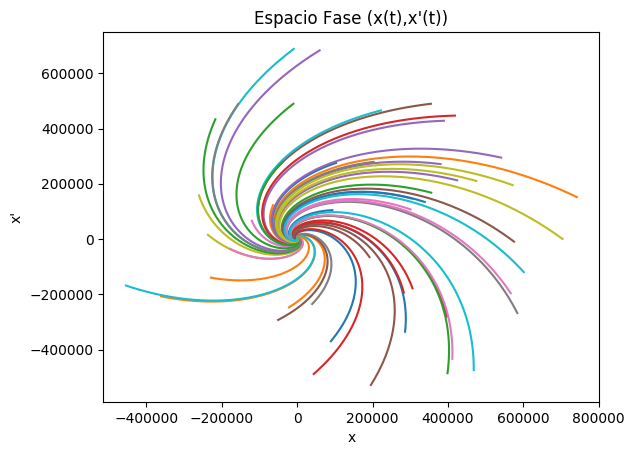

In [4]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-30
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [5]:
#Sistema formado  a=d=-1, b=-c=1
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [6]:
f(x,t)=[-x[1]+x[2], -x[1]-x[2]]

f (generic function with 1 method)

In [7]:
using PyPlot

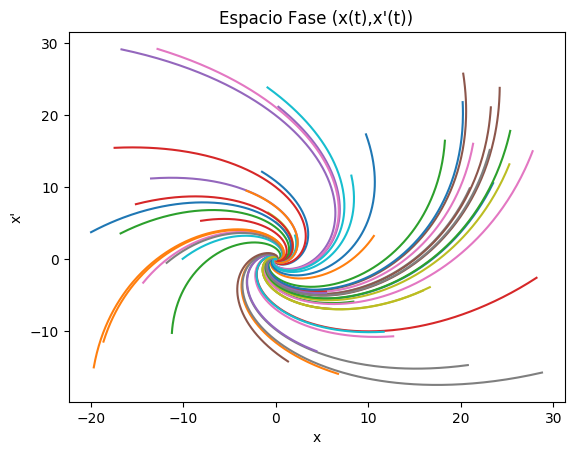

In [8]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-20
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [9]:
#Sistema formado a=d=-1, b=-c=-1
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [10]:
f(x,t)=[-x[1]-x[2], x[1]-x[2]]

f (generic function with 1 method)

In [11]:
using PyPlot

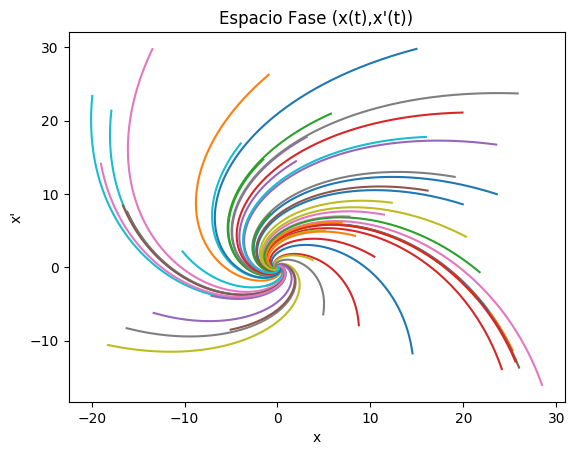

In [12]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-20
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [13]:
#Sistema formado a=d=1, b=4,c=-2
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [14]:
f(x,t)=[x[1]+4*x[2], -2*x[1]+x[2]]

f (generic function with 1 method)

In [15]:
using PyPlot

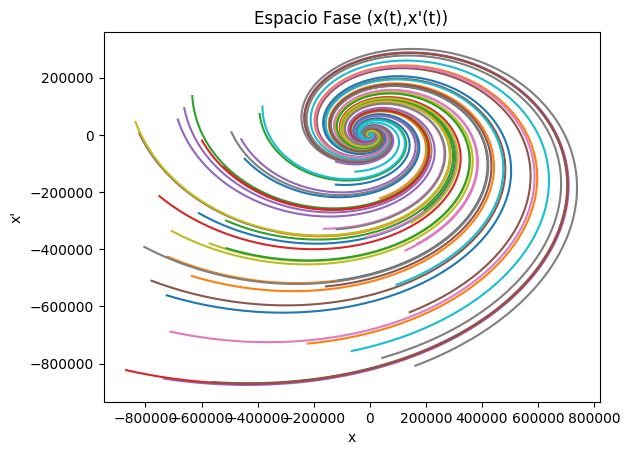

In [16]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-10
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end

In [17]:
#Sistema formado a=b=d=-1, c=0
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [18]:
f(x,t)=[-x[1]-x[2], -x[1]]

f (generic function with 1 method)

In [19]:
using PyPlot

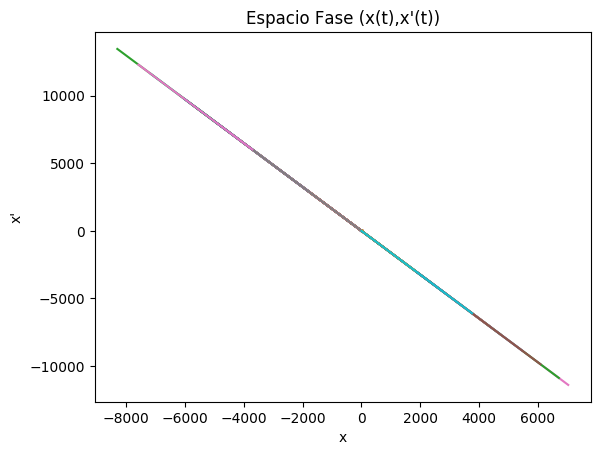

In [20]:
list=linspace(0,10,1000)
for i in 1:50
    ci=50*rand(2,1)-20
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    plot(map(x->x[1],y),map(x->x[2],y))
end